In [1]:
import os
import pandas as pd

s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
print(f'URL: {s}')

df = pd.read_csv(s, header=None, encoding='utf-8')

df.describe()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


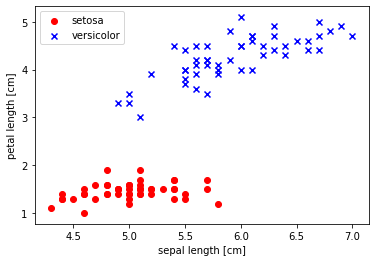

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)

x = df.iloc[0:100, [0, 2]].values

plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

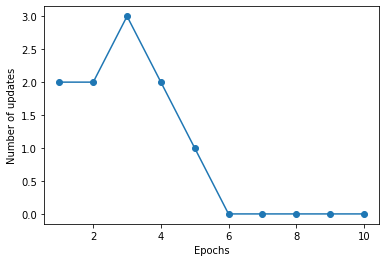

In [3]:
from perceptron import Perceptron

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(x, y)

plt.plot(range(1, len(ppn._errors) + 1), ppn._errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

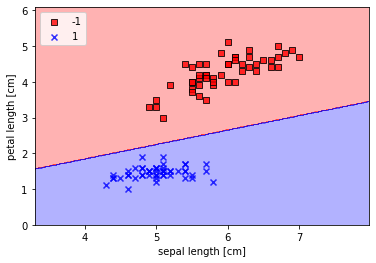

In [4]:
from helper import plot_decision_regions

plot_decision_regions(x, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()